In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans

# 資料範例

In [3]:
data = {
    'USERID':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'Labels':['信用卡,車貸', 
              '旅遊,銀行,小孩', 
              '信貸,車貸', 
              '網路論壇,大學教育,旅遊',
              '信用卡,銀行,信貸',
              '美股,小孩,大學教育,汽車零件,外套,鞋子',
              '旅遊,信用卡,網路論壇',
              '美股,銀行,車貸,大學教育',
              '基金,小孩,大學教育,汽車零件,外套,鞋子',
              '信用卡,銀行,信貸,父親節,紀念品']
    
}

# 隨機生成資料集合 （事先塞入兩個 較確切的分群）

In [152]:
import random, string
keywords = ['車貸','信貸','汽車','信用卡','旅遊','銀行','小孩','網路論壇','大學教育','外套','鞋子','父親節','紀念品','線上遊戲','解謎遊戲']
rand_idx = tuple(random.sample(keywords, 2))
','.join(rand_idx) 
list_data = []
for i in range(1,1000):
    rand_idx = tuple(random.sample(keywords, 10))
    str_key = ','.join(rand_idx) 
    list_data.append([i, str_key])
# 車貸族群
keywords = ['車貸','汽車']   
for i in range(1000,1500):
    rand_idx = tuple(random.sample(keywords, 2))
    str_key = ','.join(rand_idx) 
    list_data.append([i, str_key])
# 信貸旅遊
keywords = ['信貸','旅遊']   
for i in range(1500,2000):
    rand_idx = tuple(random.sample(keywords, 2))
    str_key = ','.join(rand_idx) 
    list_data.append([i, str_key])

list_data


[[1, '旅遊,信貸,父親節,網路論壇,銀行,大學教育,外套,鞋子,汽車,解謎遊戲'],
 [2, '銀行,外套,車貸,信用卡,大學教育,父親節,紀念品,網路論壇,小孩,旅遊'],
 [3, '小孩,銀行,旅遊,大學教育,汽車,車貸,父親節,信用卡,紀念品,鞋子'],
 [4, '信用卡,紀念品,網路論壇,解謎遊戲,信貸,車貸,大學教育,線上遊戲,小孩,鞋子'],
 [5, '大學教育,信用卡,信貸,汽車,解謎遊戲,小孩,銀行,旅遊,網路論壇,鞋子'],
 [6, '父親節,線上遊戲,網路論壇,車貸,解謎遊戲,汽車,銀行,鞋子,信用卡,紀念品'],
 [7, '外套,信貸,信用卡,小孩,車貸,父親節,銀行,線上遊戲,大學教育,旅遊'],
 [8, '線上遊戲,小孩,父親節,解謎遊戲,旅遊,鞋子,大學教育,汽車,信貸,外套'],
 [9, '車貸,信貸,銀行,小孩,大學教育,網路論壇,汽車,旅遊,信用卡,外套'],
 [10, '外套,網路論壇,信用卡,線上遊戲,銀行,紀念品,解謎遊戲,父親節,鞋子,車貸'],
 [11, '外套,信用卡,線上遊戲,車貸,解謎遊戲,信貸,父親節,鞋子,汽車,大學教育'],
 [12, '銀行,汽車,紀念品,外套,父親節,信貸,車貸,解謎遊戲,鞋子,旅遊'],
 [13, '旅遊,銀行,車貸,紀念品,外套,大學教育,小孩,線上遊戲,解謎遊戲,鞋子'],
 [14, '信貸,鞋子,外套,線上遊戲,車貸,解謎遊戲,信用卡,紀念品,大學教育,小孩'],
 [15, '大學教育,鞋子,銀行,車貸,解謎遊戲,汽車,線上遊戲,信貸,網路論壇,父親節'],
 [16, '紀念品,信用卡,網路論壇,銀行,小孩,線上遊戲,外套,大學教育,旅遊,信貸'],
 [17, '銀行,大學教育,紀念品,信貸,車貸,信用卡,小孩,網路論壇,鞋子,汽車'],
 [18, '銀行,汽車,父親節,網路論壇,車貸,大學教育,鞋子,旅遊,紀念品,信貸'],
 [19, '外套,信用卡,父親節,線上遊戲,小孩,解謎遊戲,旅遊,車貸,汽車,信貸'],
 [20, '汽車,外套,旅遊,小孩,信用卡,紀念品,網路論壇,鞋子,車貸,銀行'],
 [21, '紀念品,車貸,銀行,鞋子,解謎遊戲,汽車,信用卡,大學教育,信貸,網路論壇'],
 [22, '解謎遊戲,信用卡,父親節,鞋子,

In [153]:
data = pd.DataFrame(list_data, columns = ['USERID', 'Labels'])
data['Labels'].astype(str)
data.info()
data['Labels'] = tuple(data['Labels'])
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   USERID  1999 non-null   int64 
 1   Labels  1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


,USERID,Labels
0,1,"旅遊,信貸,父親節,網路論壇,銀行,大學教育,外套,鞋子,汽車,解謎遊戲"
1,2,"銀行,外套,車貸,信用卡,大學教育,父親節,紀念品,網路論壇,小孩,旅遊"
2,3,"小孩,銀行,旅遊,大學教育,汽車,車貸,父親節,信用卡,紀念品,鞋子"
3,4,"信用卡,紀念品,網路論壇,解謎遊戲,信貸,車貸,大學教育,線上遊戲,小孩,鞋子"
4,5,"大學教育,信用卡,信貸,汽車,解謎遊戲,小孩,銀行,旅遊,網路論壇,鞋子"
...,...,...
1994,1995,"旅遊,信貸"
1995,1996,"旅遊,信貸"
1996,1997,"旅遊,信貸"
1997,1998,"信貸,旅遊"


In [154]:
def to_tokens(s, stopwords=None, min_chars=1):
    """
    Transforms sentence to list of tokens.  

    Basic: transform special characters to ascii + lowercase.  
    Options:  
    - remove stopwords (provide list of stopwords)  
    - set minimum length for tokens: will remove any shorter token. 
    
    Returns sorted tokens
    """
    s = str(s) 
    tokens = s.split(",") # split the string into a list of words
    
    if min_chars > 1:
        tokens = [word for word in tokens if len(word) >= min_chars] # remove any shorter words
    
    if stopwords is not None:
          tokens = [word for word in tokens if word not in stopwords] # remove words if they appear in our stopwords list
    
    tokens = set(tokens) # transforming a list to a set removes duplicates
    tokens = sorted(tokens) # converts our set back to a list and sorts words in alphabetical order
    return tokens

data["tokens"] = data["Labels"].apply(lambda x: to_tokens(
    x,
    stopwords=None,
    min_chars=1,
))
data['tokens']

0         [信貸, 外套, 大學教育, 旅遊, 汽車, 父親節, 網路論壇, 解謎遊戲, 銀行, 鞋子]
1         [信用卡, 外套, 大學教育, 小孩, 旅遊, 父親節, 紀念品, 網路論壇, 車貸, 銀行]
2           [信用卡, 大學教育, 小孩, 旅遊, 汽車, 父親節, 紀念品, 車貸, 銀行, 鞋子]
3       [信用卡, 信貸, 大學教育, 小孩, 紀念品, 網路論壇, 線上遊戲, 解謎遊戲, 車貸,...
4         [信用卡, 信貸, 大學教育, 小孩, 旅遊, 汽車, 網路論壇, 解謎遊戲, 銀行, 鞋子]
                              ...                        
1994                                             [信貸, 旅遊]
1995                                             [信貸, 旅遊]
1996                                             [信貸, 旅遊]
1997                                             [信貸, 旅遊]
1998                                             [信貸, 旅遊]
Name: tokens, Length: 1999, dtype: object

In [155]:
## 全部字詞都進去
vocab = sorted(set(data["tokens"].explode()))
len(vocab)

def to_vector(keyword,vocab):
    """
    Calculates vector of keyword on given vocabulary.

    Returns vector as a list of values.  
    """
    vector = []
    for word in vocab:
        if word in keyword:
            vector.append(1)
        else:
            vector.append(0)
    return vector


data["vector"] = data["tokens"].apply(lambda x: to_vector(x,vocab))
data

,USERID,Labels,tokens,vector
0,1,"旅遊,信貸,父親節,網路論壇,銀行,大學教育,外套,鞋子,汽車,解謎遊戲","[信貸, 外套, 大學教育, 旅遊, 汽車, 父親節, 網路論壇, 解謎遊戲, 銀行, 鞋子]","[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1]"
1,2,"銀行,外套,車貸,信用卡,大學教育,父親節,紀念品,網路論壇,小孩,旅遊","[信用卡, 外套, 大學教育, 小孩, 旅遊, 父親節, 紀念品, 網路論壇, 車貸, 銀行]","[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0]"
2,3,"小孩,銀行,旅遊,大學教育,汽車,車貸,父親節,信用卡,紀念品,鞋子","[信用卡, 大學教育, 小孩, 旅遊, 汽車, 父親節, 紀念品, 車貸, 銀行, 鞋子]","[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1]"
3,4,"信用卡,紀念品,網路論壇,解謎遊戲,信貸,車貸,大學教育,線上遊戲,小孩,鞋子","[信用卡, 信貸, 大學教育, 小孩, 紀念品, 網路論壇, 線上遊戲, 解謎遊戲, 車貸,...","[1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1]"
4,5,"大學教育,信用卡,信貸,汽車,解謎遊戲,小孩,銀行,旅遊,網路論壇,鞋子","[信用卡, 信貸, 大學教育, 小孩, 旅遊, 汽車, 網路論壇, 解謎遊戲, 銀行, 鞋子]","[1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]"
...,...,...,...,...
1994,1995,"旅遊,信貸","[信貸, 旅遊]","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1995,1996,"旅遊,信貸","[信貸, 旅遊]","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1996,1997,"旅遊,信貸","[信貸, 旅遊]","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1997,1998,"信貸,旅遊","[信貸, 旅遊]","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [156]:
# K-mode
## 以下為將各關鍵字變成各 column 的 1/0
from sklearn import preprocessing

# 將 Appier 興趣標籤拆成一個一個rows
print(data.index.is_unique)
print(data[data.index.duplicated() == True])
print(data[data.USERID.duplicated() == True])
freq = data.set_index(['USERID'])['Labels'].astype(str).str.split(',').explode().reset_index()
#計算該欄位下 各個 rows(字串) 出現幾次
freq_table = Counter(freq['Labels'])
freq_table

#轉成詞頻表
freq['count'] = 1
transform_freq = pd.pivot_table(freq, index=["USERID"], columns="Labels", values="count").sort_values(by = ['USERID']).reset_index()
transform_freq = transform_freq.fillna(int(0))
transform_freq

True
Empty DataFrame
Columns: [USERID, Labels, tokens, vector]
Index: []
Empty DataFrame
Columns: [USERID, Labels, tokens, vector]
Index: []


Labels,USERID,信用卡,信貸,外套,大學教育,小孩,旅遊,汽車,父親節,紀念品,網路論壇,線上遊戲,解謎遊戲,車貸,銀行,鞋子
0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1,2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,3,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,4,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,5,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1995,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,1996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,1997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,1998,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
data.set_index(['USERID'])['Labels'].astype(str).str.split(',').explode().reset_index()

,USERID,Labels
0,1,旅遊
1,1,信貸
2,1,父親節
3,1,網路論壇
4,1,銀行
...,...,...
11985,1997,信貸
11986,1998,信貸
11987,1998,旅遊
11988,1999,信貸


# Kmeans

In [158]:
kmeans = KMeans(n_clusters = 3, init = "random", n_init = 5, verbose=1).fit(data["vector"].to_list())
data["kmeans"] = list(kmeans.labels_)
data.count()
data.groupby("kmeans")["Labels"].count()

Initialization complete
Iteration 0, inertia 7602.0
Iteration 1, inertia 4185.319985472074
Iteration 2, inertia 4176.699604933668
Iteration 3, inertia 4167.924658718562
Iteration 4, inertia 4159.542771306024
Iteration 5, inertia 4142.003754419453
Iteration 6, inertia 4112.458257500162
Iteration 7, inertia 4085.8433777857636
Iteration 8, inertia 4085.413914934095
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 6522.0
Iteration 1, inertia 3352.9616137409093
Iteration 2, inertia 3324.886886886887
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 8652.0
Iteration 1, inertia 4473.561234643479
Iteration 2, inertia 4278.946700961094
Iteration 3, inertia 4219.2005449345415
Iteration 4, inertia 4178.118875334682
Iteration 5, inertia 4159.218337610569
Iteration 6, inertia 4144.496481382748
Iteration 7, inertia 4117.316850290461
Iteration 8, inertia 4078.5110102196586
Iteration 9, inertia 4074.95655330366
Converge

kmeans
0    999
1    500
2    500
Name: Labels, dtype: int64

# Kmodes

In [190]:
from kmodes import kmodes
kmodes = kmodes.KModes(n_clusters=3, init = "huang", n_init = 5, verbose=1, random_state = 1)
km = kmodes.fit_predict(transform_freq.iloc[:,2:16])
data["kmodes"] = list(kmodes.labels_)
data.count()
data.groupby("kmodes")["Labels"].count()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 782, cost: 4683.0
Run 1, iteration: 2/100, moves: 22, cost: 4683.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 253, cost: 4683.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 781, cost: 4683.0
Run 3, iteration: 2/100, moves: 53, cost: 4683.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 277, cost: 6366.0
Run 4, iteration: 2/100, moves: 115, cost: 6366.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 302, cost: 6497.0
Best run was number 1


kmodes
0    500
1    500
2    999
Name: Labels, dtype: int64

# Spherical Kmeans

In [160]:
from soyclustering import SphericalKMeans
from scipy.sparse import csr_matrix
spherical_kmeans = SphericalKMeans(n_clusters=3)
transform_array = csr_matrix(transform_freq.iloc[:,2:16] , dtype=np.double)
sk = spherical_kmeans.fit_predict(transform_array)
pd.DataFrame(sk, columns = ['labels_'])
data["sp-kmeans"] = list(pd.DataFrame(sk, columns = ['labels_']).labels_)
data.count()
data.groupby("sp-kmeans")["Labels"].count()


sp-kmeans
0    500
1    500
2    999
Name: Labels, dtype: int64

# KMedoids

In [73]:
## 套件裝不進去Q
# from sklearn_extra.cluster import KMedoids
# kmedoids = KMedoids(n_clusters=3,init='random',random_state=5)

# DBSCAN / HDBSCAN

In [161]:
from sklearn.cluster import DBSCAN
import hdbscan
dbscan = DBSCAN(eps=0.03, min_samples=20).fit(transform_freq.iloc[:,2:16])
data["dbscan"] = list(dbscan.labels_ +1 )
data.count()
data.groupby("dbscan")["Labels"].count()

dbscan
0    999
1    500
2    500
Name: Labels, dtype: int64

# DBSCAN / HDBSCAN + Gower Distance

In [162]:
from sklearn.neighbors import DistanceMetric
import gower
dist_matrix = gower.gower_matrix(transform_freq.iloc[:,2:16])
dist_matrix.shape
array_double = np.array(dist_matrix , dtype=np.double)
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=2, min_samples=5, metric = "precomputed").fit(array_double)
import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=3, metric = "precomputed").fit(array_double)
# data["dbscan"] = list(dbscan.labels_)
data["hdbscan"] = list(hdbscan.labels_ + 1)
#data.groupby("dbscan")["Labels"].count()
data.groupby("hdbscan")["Labels"].count()


hdbscan
0     191
1     500
2     500
3      13
4      13
5       4
6      18
7     367
8      12
9      31
10      9
11      4
12      9
13      4
14      9
15      6
16      7
17      5
18     12
19      3
20     12
21     32
22     91
23     30
24     30
25      3
26      8
27      3
28     73
Name: Labels, dtype: int64

## MDS for Plotting 

In [163]:
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

In [164]:
mds = MDS(n_components = 2, random_state = 0)
label_x = mds.fit_transform(transform_freq.iloc[:,2:16])
label_x

array([[-1.3252255 ,  1.53316859],
       [-0.3356469 ,  1.97245665],
       [ 2.01379863,  0.14561916],
       ...,
       [-1.07817544, -1.08834084],
       [-1.07817544, -1.08834084],
       [-1.07817544, -1.08834084]])

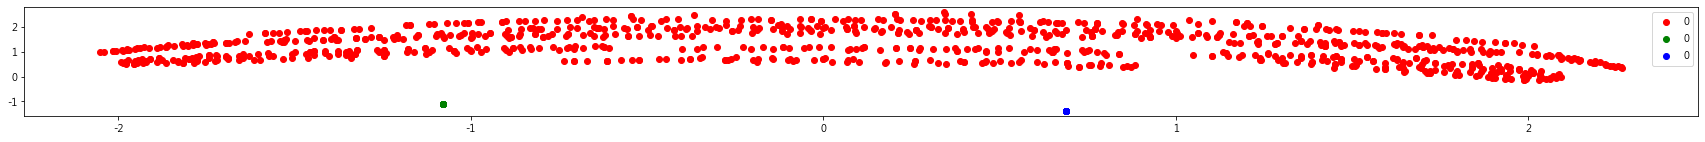

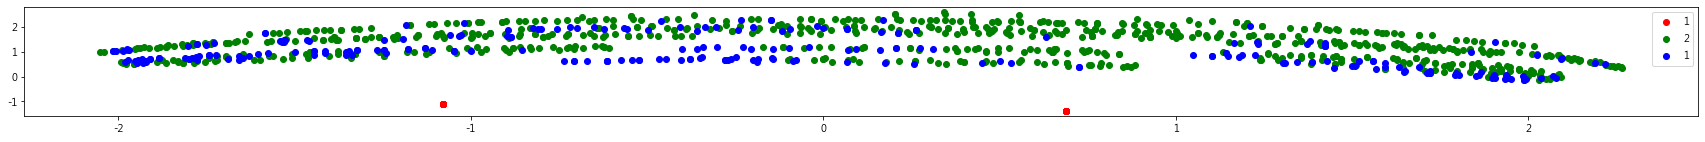

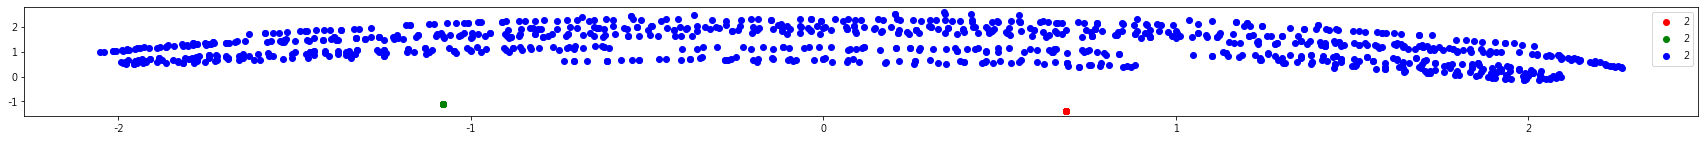

In [168]:
colors = ['red','green','blue']

for i in np.unique(data.kmeans):
    subset = label_x[data.kmeans == i]
    x = [row[0] for row in subset]
    y = [row[1] for row in subset]
    plt.scatter(x,y,c=colors[i], label=data.kmeans[i])
plt.legend()
plt.show()

for i in np.unique(data.kmodes):
    subset = label_x[data.kmodes == i]
    x = [row[0] for row in subset]
    y = [row[1] for row in subset]
    plt.scatter(x,y,c=colors[i], label=data.kmodes[i])
plt.legend()
plt.show()

# colors = ['red','green','blue', 'c', 'k', 'm', 'y', 'pink', 'purple', 'darkorange', 'royalblue', 'brown', 'gold', 'darkslategray', 
#           'lime', 'coral', 'crimson', 'navy', 'wheat', 'tan', 'tomato', 'aqua', 'lawngreen', 'silver', 'dimgray']

# for i in np.unique(data.hdbscan):
#     subset = label_x[data.hdbscan == i]
#     x = [row[0] for row in subset]
#     y = [row[1] for row in subset]
#     plt.scatter(x,y,c=colors[i], label=data.hdbscan[i])
# plt.legend()
# plt.show()

for i in np.unique(data['sp-kmeans']):
    subset = label_x[data['sp-kmeans'] == i]
    x = [row[0] for row in subset]
    y = [row[1] for row in subset]
    plt.scatter(x,y,c=colors[i], label=data['sp-kmeans'][i])
plt.legend()
plt.show()


# 查看各分群之標籤出現次數

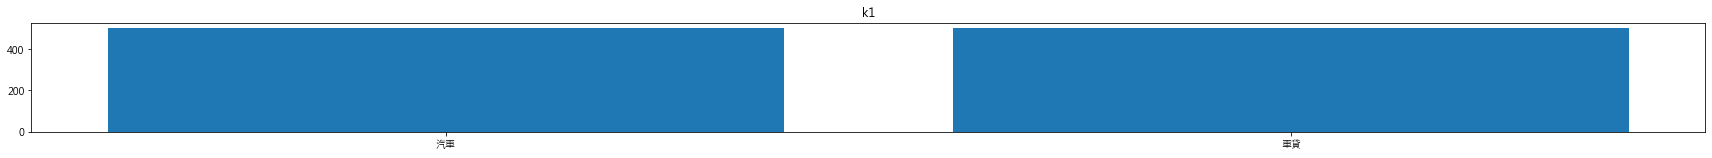

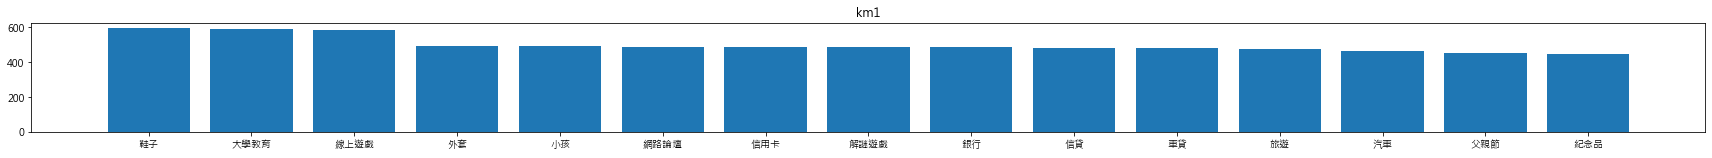

In [166]:
# Kmeans
k1 = data[data['kmeans'] == 2]
freq_k1 = Counter(k1["tokens"].explode().to_list())

# 篩選 Top N 方便畫圖
freq_k1 = dict(freq_k1.most_common(20))
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['font.serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
plt.bar(range(len(freq_k1)), list(freq_k1.values()), align='center')
plt.xticks(range(len(freq_k1)), list(freq_k1.keys()))
plt.title("k1")
plt.rcParams['figure.figsize'] = [30, 2]
plt.show()


# Kmodes
km1 = data[data['kmodes'] == 1]
freq_km1 = Counter(km1["tokens"].explode().to_list())
# 篩選 Top N 方便畫圖
freq_km1 = dict(freq_km1.most_common(20))
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['font.serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
plt.bar(range(len(freq_km1)), list(freq_km1.values()), align='center')
plt.xticks(range(len(freq_km1)), list(freq_km1.keys()))
plt.title("km1")
plt.rcParams['figure.figsize'] = [30, 2]
plt.show()


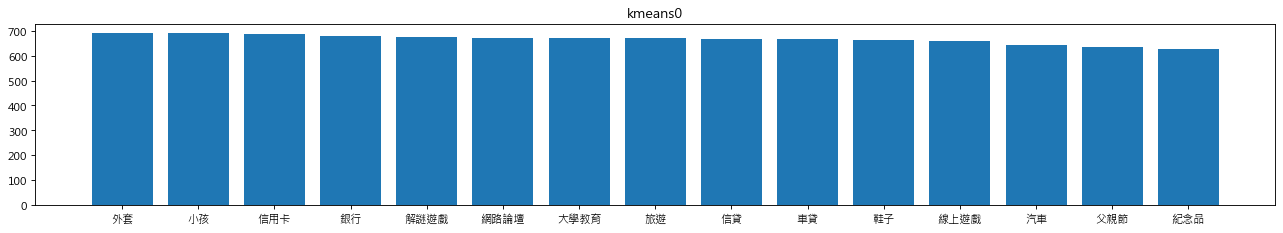

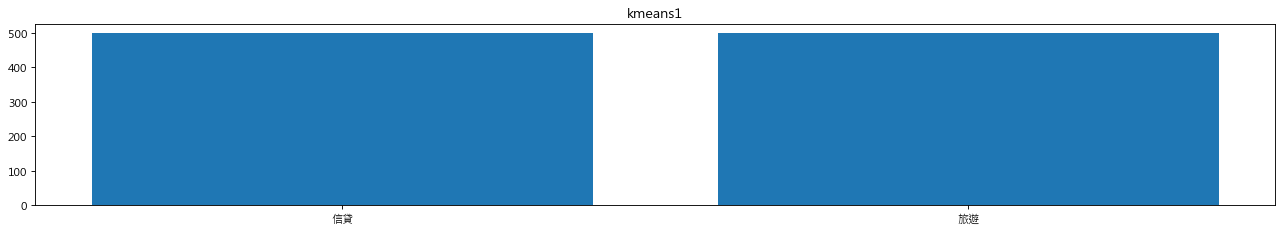

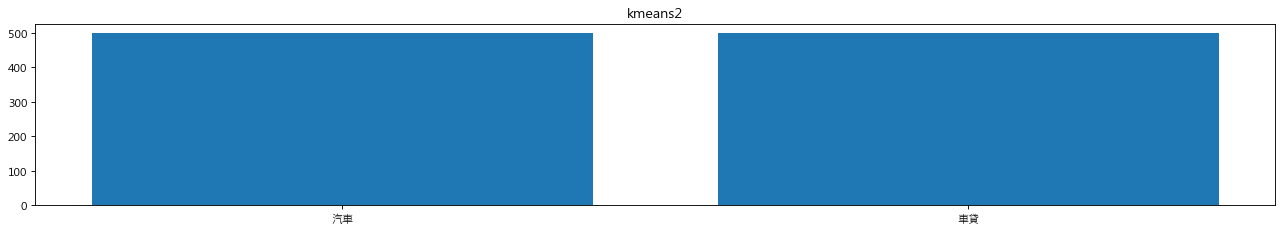

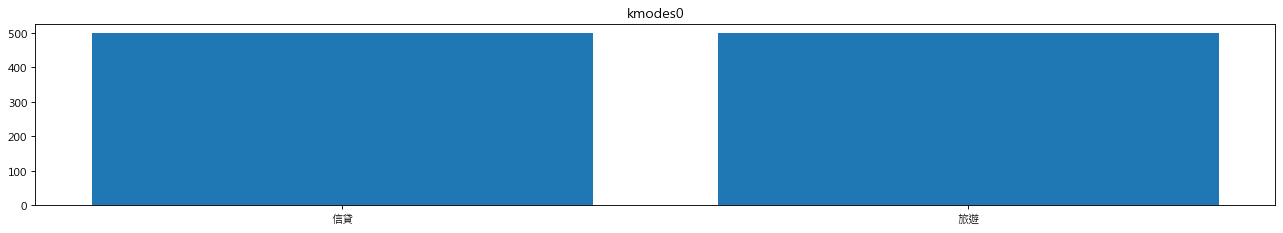

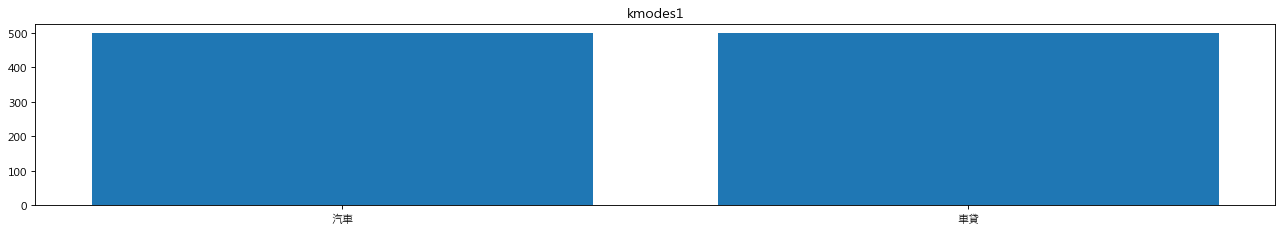

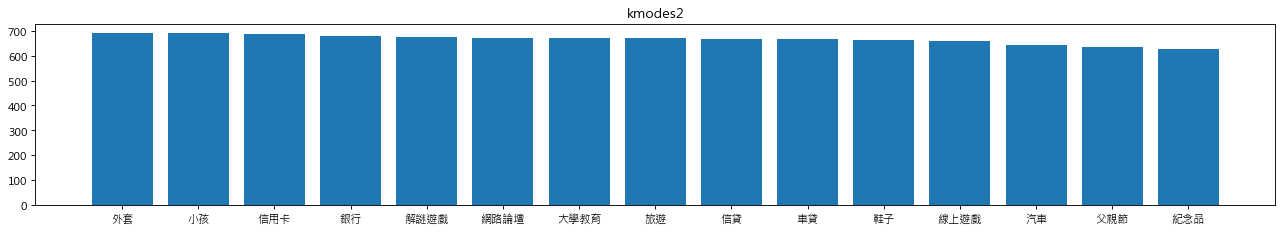

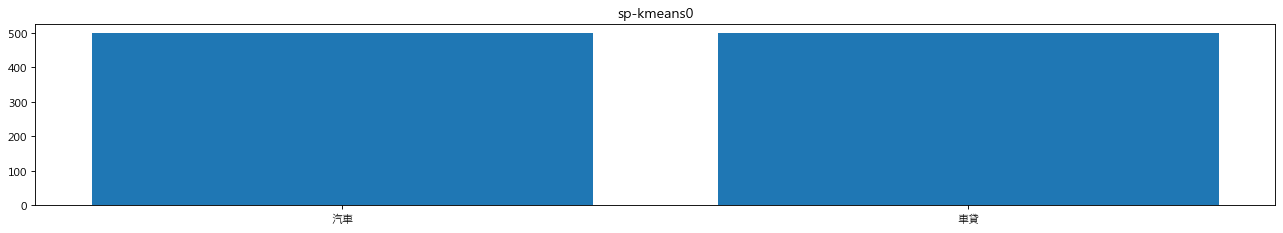

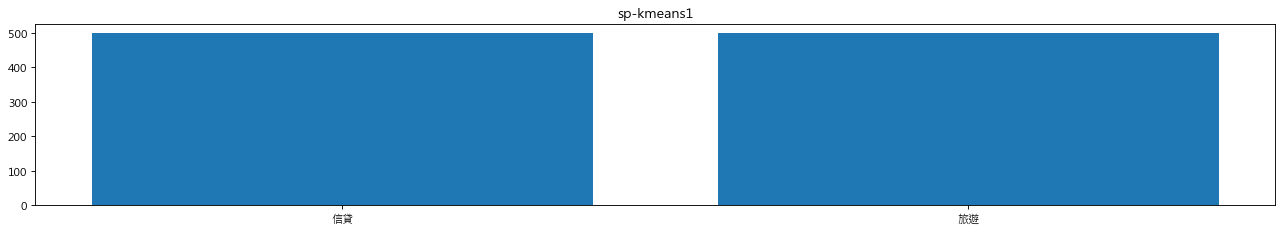

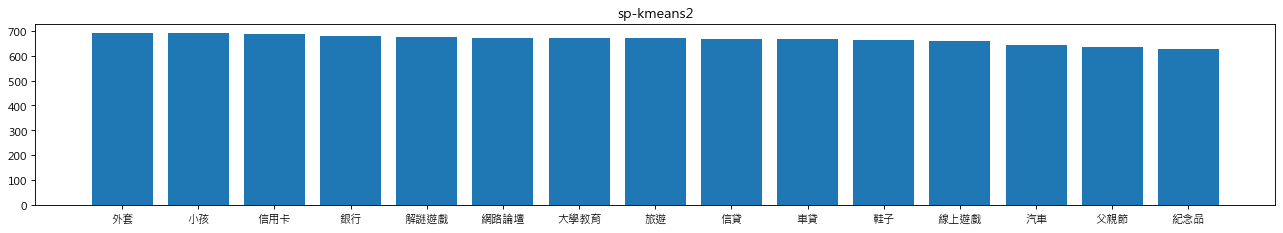

In [194]:
# 產製各群的字詞頻率長條圖
# Kmeans
for i in range(0, 3):
    k = data[data['kmeans'] == i]
    freq = Counter(k["tokens"].explode().to_list())
    ## 篩選 Top N 方便畫圖
    freq = dict(freq.most_common(20))
    plt.figure(figsize=(20, 3), dpi=80)
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
    plt.rcParams['font.serif'] = ['Microsoft JhengHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.bar(range(len(freq)), list(freq.values()), align='center')
    plt.xticks(range(len(freq)), list(freq.keys()))
    plt.title("kmeans{}".format(i))
    # plt.savefig('C:/Users/120470.BANK/Desktop/數位通路客戶/大咖推廣/07月_大咖繳費網導流/0701plot{}.jpg'.format(i))
    plt.show()
    
# Kmodes
for i in range(0, 3):
    k = data[data['kmodes'] == i]
    freq = Counter(k["tokens"].explode().to_list())
    ## 篩選 Top N 方便畫圖
    freq = dict(freq.most_common(20))
    plt.figure(figsize=(20, 3), dpi=80)
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
    plt.rcParams['font.serif'] = ['Microsoft JhengHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.bar(range(len(freq)), list(freq.values()), align='center')
    plt.xticks(range(len(freq)), list(freq.keys()))
    plt.title("kmodes{}".format(i))
    # plt.savefig('C:/Users/120470.BANK/Desktop/數位通路客戶/大咖推廣/07月_大咖繳費網導流/0701plot{}.jpg'.format(i))
    plt.show()   
    
# Spherical Kmeans
for i in range(0, 3):
    k = data[data['sp-kmeans'] == i]
    freq = Counter(k["tokens"].explode().to_list())
    ## 篩選 Top N 方便畫圖
    freq = dict(freq.most_common(20))
    plt.figure(figsize=(20, 3), dpi=80)
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
    plt.rcParams['font.serif'] = ['Microsoft JhengHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.bar(range(len(freq)), list(freq.values()), align='center')
    plt.xticks(range(len(freq)), list(freq.keys()))
    plt.title("sp-kmeans{}".format(i))
    # plt.savefig('C:/Users/120470.BANK/Desktop/數位通路客戶/大咖推廣/07月_大咖繳費網導流/0701plot{}.jpg'.format(i))
    plt.show()   
